In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

4
WARN: <class 'wrappers.FrameStack'> doesn't implement 'reset' method, but it implements deprecated '_reset' method.
done


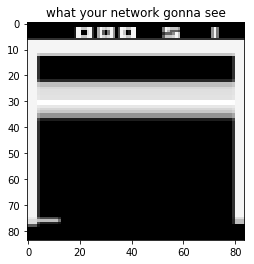

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name1 = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
import networks
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

breakout_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.9,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : False,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariDQN()
    }


pong_noisy_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.0,
    'MIN_EPSILON' : 0.00,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.0,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = breakout_dddqn_config)
#agent.restore('nn/DDDQNPongNoFrameskip-v4')
#agent.epsilon = 0.02

In [6]:
env.reset()
agent.train()

285
saving next best rewards:  0.2
570
830
Frames per seconds:  99.57693080370233
1085
1430
saving next best rewards:  0.4
1660
1970
Frames per seconds:  99.8282146163428
2260
2865
saving next best rewards:  1.0
Frames per seconds:  101.25805095856106
3315
3570
3830
Frames per seconds:  100.95405498521157
4285
4515
4770
Frames per seconds:  99.85813030893851
5030
5315
5600
5885
Frames per seconds:  99.90729589345747
6175
6405
6690
Frames per seconds:  99.99872686099663
7005
7260
7520
7860
Frames per seconds:  100.29658520618769
8145
8375
8635
Frames per seconds:  100.27756510916899
9025
9310
9570
9885
Frames per seconds:  100.11373566399548
10330
10590
10875
Frames per seconds:  100.37768614995784
11270
11620
11915
Frames per seconds:  100.68989182526715
12170
12520
12775
Frames per seconds:  99.9676284711386
13155
13470
13785
Frames per seconds:  100.08592830367601
14100
14385
14785
Frames per seconds:  100.1652080757492
15070
15355
15825
Frames per seconds:  100.43829253006147
16170


Frames per seconds:  95.3745512843456
165080
Frames per seconds:  96.53202200457575
166165
Frames per seconds:  96.08929783012461
167795
Frames per seconds:  96.17990732267708
168650
Frames per seconds:  95.46451683592979
169820
Frames per seconds:  92.47214858743047
Frames per seconds:  92.57461085394617
171555
Frames per seconds:  93.10405970871774
Frames per seconds:  93.93684103401333
173460
saving next best rewards:  5.7
Frames per seconds:  93.89925841305144
Frames per seconds:  94.4366565992569
175195
Frames per seconds:  95.59328438616022
176845
Frames per seconds:  94.03314811595577
Frames per seconds:  95.53865889571966
178195
Frames per seconds:  94.94805004445415
Frames per seconds:  94.47615608393046
180635
saving next best rewards:  6.9
Frames per seconds:  95.05835715890302
Frames per seconds:  94.94153573576712
182635
Frames per seconds:  95.72995901393146
Frames per seconds:  95.74845794861996
184545
Frames per seconds:  94.8781973489958
Frames per seconds:  95.3180568

KeyboardInterrupt: 

In [ ]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [ ]:

print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)

import gym.wrappers
env_monitor = make_atari_deepmind(env_name)
env_monitor = gym.wrappers.Monitor(env,directory='video_dddqn',force=True)
sessions = [evaluate(env_monitor) for _ in range(5)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()